# Emotion Recognition EDA

## Read the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt 

In [2]:
data = pd.read_csv("fer2013.csv")
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [3]:
data.describe()

,emotion
count,35887.000000
mean,3.323265
std,1.873819
min,0.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,6.000000


## Assigning the training and the testing sets

In [4]:
train = data[data["Usage"] == "Training"]

In [5]:
train

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
28704,2,84 85 85 85 85 85 85 85 86 86 86 87 86 86 91 9...,Training
28705,0,114 112 113 113 111 111 112 113 115 113 114 11...,Training
28706,4,74 81 87 89 95 100 98 93 105 120 127 133 146 1...,Training
28707,0,222 227 203 90 86 90 84 77 94 87 99 119 134 14...,Training


In [6]:
train.describe()

,emotion
count,28709.000000
mean,3.317427
std,1.876632
min,0.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,6.000000


In [7]:
test = data[data["Usage"] == "PublicTest"]

In [8]:
test

,emotion,pixels,Usage
28709,0,254 254 254 254 254 249 255 160 2 58 53 70 77 ...,PublicTest
28710,1,156 184 198 202 204 207 210 212 213 214 215 21...,PublicTest
28711,4,69 118 61 60 96 121 103 87 103 88 70 90 115 12...,PublicTest
28712,6,205 203 236 157 83 158 120 116 94 86 155 180 2...,PublicTest
28713,3,87 79 74 66 74 96 77 80 80 84 83 89 102 91 84 ...,PublicTest
...,...,...,...
32293,4,178 176 172 173 173 174 176 173 166 166 206 22...,PublicTest
32294,3,25 34 42 44 42 47 57 59 59 58 54 51 50 56 63 6...,PublicTest
32295,4,255 255 255 255 255 255 255 255 255 255 255 25...,PublicTest
32296,4,33 25 31 36 36 42 69 103 132 163 175 183 187 1...,PublicTest


In [9]:
test.describe()

,emotion
count,3589.000000
mean,3.360825
std,1.846366
min,0.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,6.000000


## Visualization tools for emotion

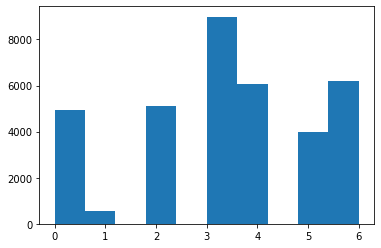

In [10]:
%matplotlib inline

plt.hist(data["emotion"])
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


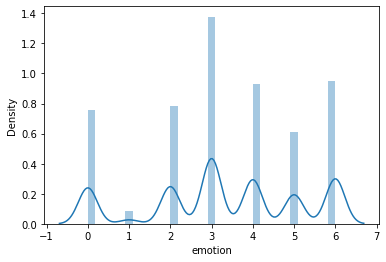

In [11]:
sns.distplot(data["emotion"])
plt.show()

In [12]:
data["emotion"].value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

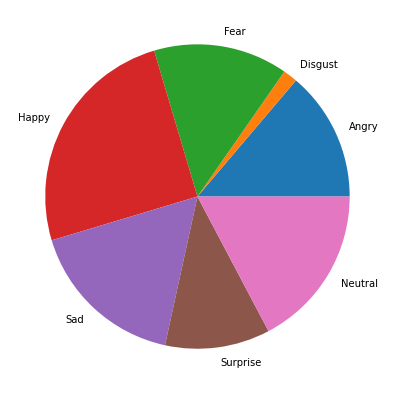

In [13]:
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
number = [4953, 547, 5121, 8989, 6077, 4002, 6198] 
  
fig = plt.figure(figsize = (10, 7)) 
plt.pie(number, labels = emotions) 

plt.show()

## Convert the pixels into images (for 100 images)

In [14]:
## Require the library PIL

from PIL import Image

pixels = data["pixels"]

for x in range(100):
    b = bytes(int(p) for p in pixels[x].split())
    i = Image.frombuffer('L',(48,48),b)
    i.save("image_%x.png"%x)